In [1]:
import glob
import numpy as np
import pandas as pd
import pickle as pkl


import hist as hist2
import matplotlib.pyplot as plt
import mplhep as hep

plt.style.use(hep.style.CMS)
plt.rcParams.update({"font.size": 20})

In [2]:
samples_dir = "/Users/cmantill/CMS/HWW/boostedhiggs/binder/testTT_2017"
sample = "TTToSemiLeptonic"

ch = "mu"

out_files = f"{samples_dir}/{sample}/outfiles/"
parquet_files = glob.glob(f"{out_files}/*_{ch}.parquet")
pkl_files = glob.glob(f"{out_files}/*.pkl")

data = pd.read_parquet(parquet_files)

data = data.fillna(-1)

In [3]:
data.columns

Index(['fj_pt', 'fj_msoftdrop', 'fj_lsf3', 'fj_sj1_pt', 'fj_sj2_pt', 'fj_tau3',
       'fj_tau2', 'fj_bjets_ophem', 'fj_bjets', 'lep_pt', 'lep_isolation',
       'lep_misolation', 'fj_minus_lep_m', 'fj_minus_lep_pt',
       'dphi_lep_and_fj_minus_lep', 'lep_fj_dr', 'lep_met_mt', 'met_fj_dphi',
       'rec_higgs_m', 'rec_higgs_pt', 'rec_W_lnu_m', 'rec_W_lnu_pt',
       'rec_W_qq_m', 'rec_W_qq_pt', 'rec_dphi_WW', 'lep_mvaId', 'mu_highPtId',
       'ele_highPtId', 'met', 'ht', 'nfj', 'nj', 'deta', 'mjj', 'n_bjets_L',
       'n_bjets_M', 'n_bjets_T', 'n_bjets_ophem_L', 'n_bjets_ophem_M',
       'n_bjets_ophem_T', 'mreg', 'fj_Top_isMatched', 'fj_Top_numMatched',
       'fj_Top_nquarksnob', 'fj_Top_nbquarks', 'fj_Top_ncquarks',
       'fj_Top_nleptons', 'fj_Top_nele', 'fj_Top_nmu', 'fj_Top_ntau',
       'fj_Top_taudecay', 'weight', 'weight_genweight', 'weight_L1Prefiring',
       'weight_pileup', 'weight_trigger_iso_muon',
       'weight_trigger_noniso_muon', 'weight_isolation_muon', 'weight

In [4]:
data.fj_Top_nbquarks

0          1
1          0
2          1
3          1
4          1
          ..
1177561    1
1177562    1
1177563    1
1177564    0
1177565    0
Name: fj_Top_nbquarks, Length: 1177566, dtype: int64

In [5]:
labels = {
    "label_Top_bmv": "((fj_Top_numMatched==1) & (fj_Top_nquarksnob==0) & (fj_Top_nbquarks==1) & (fj_Top_nleptons==1))",
    "label_Top_bbmv": "((fj_Top_numMatched==1) & (fj_Top_nquarksnob==0) & (fj_Top_nbquarks==2) & (fj_Top_nleptons==1))",
    "label_Top_mv": "((fj_Top_numMatched==1) & (fj_Top_nquarksnob==0) & (fj_Top_nbquarks==0) & (fj_Top_nleptons==1))",
    "label_Top_bqsmv": "((fj_Top_numMatched==1) & (fj_Top_nquarksnob>=1) & (fj_Top_nbquarks==1) & (fj_Top_nleptons==1))",
    "label_Top_bsqsmv": "((fj_Top_numMatched==1) & (fj_Top_nquarksnob>=1) & (fj_Top_nbquarks==2) & (fj_Top_nleptons==1))",
    "label_Top_qsmv": "((fj_Top_numMatched==1) & (fj_Top_nquarksnob>=1) & (fj_Top_nbquarks==0) & (fj_Top_nleptons==1))",
    "label_Top_bsqs": "((fj_Top_numMatched==1) & (fj_Top_nquarksnob>=1) & (fj_Top_nbquarks==2) & (fj_Top_nleptons==0))",
    "label_Top_bqs": "((fj_Top_numMatched==1) & (fj_Top_nquarksnob>=1) & (fj_Top_nbquarks==1) & (fj_Top_nleptons==0))",
    "label_Top_qs": "((fj_Top_numMatched==1) & (fj_Top_nquarksnob>=1) & (fj_Top_nbquarks==0) & (fj_Top_nleptons==0))",
    "label_Top_bs": "((fj_Top_numMatched==1) & (fj_Top_nquarksnob==0) & (fj_Top_nbquarks>=1) & (fj_Top_nleptons==0))",
    "label_2Tops": "((fj_Top_numMatched==2))",
}


for l,ldef in labels.items():
    data[l] = data.query(ldef)['fj_Top_isMatched']
    data[l] = data[l].fillna(0)
    data[l] = data[l].astype(int)

unmatched = (data.label_Top_bmv==0) 
unmatched = unmatched & (data.label_Top_bbmv==0) 
unmatched = unmatched & (data.label_Top_mv==0)
unmatched = unmatched & (data.label_Top_bqsmv==0)
unmatched = unmatched & (data.label_Top_bsqsmv==0)
unmatched = unmatched & (data.label_Top_qsmv==0)
unmatched = unmatched & (data.label_Top_bsqs==0) 
unmatched = unmatched & (data.label_Top_bqs==0) 
unmatched = unmatched & (data.label_Top_qs==0)
unmatched = unmatched & (data.label_Top_bs==0)
unmatched = unmatched & (data.label_2Tops==0)

#0 0 1


In [6]:
np.any(data[unmatched].fj_Top_numMatched==1)


True

In [7]:
data[unmatched].label_Top_mv



29         0
166        0
206        0
343        0
345        0
          ..
1177491    0
1177501    0
1177513    0
1177529    0
1177554    0
Name: label_Top_mv, Length: 41485, dtype: int64

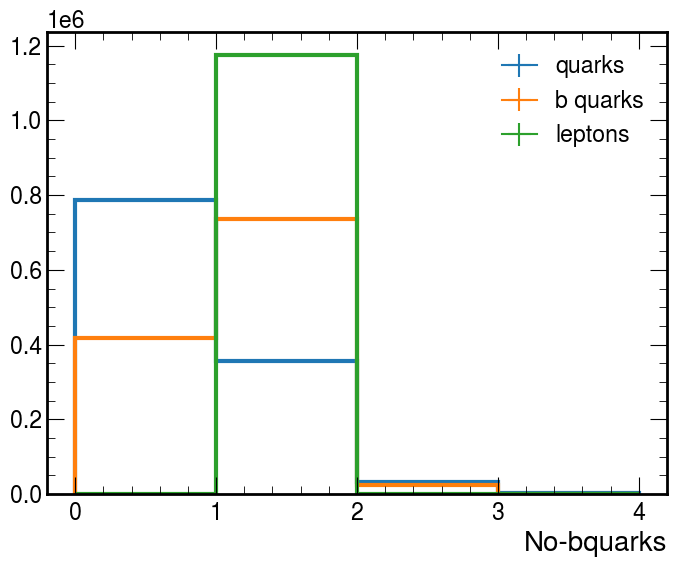

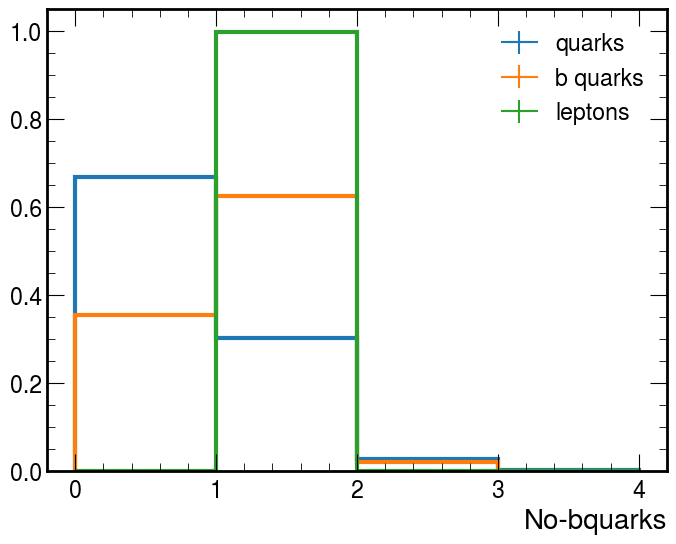

In [8]:
h = hist2.Hist(
    hist2.axis.Regular(40, 0, 200, name="mass", label=r"Jet $m_{SD}$ [GeV]", overflow=True),
    hist2.axis.Regular(4, 0, 4, name="nnob", label=r"No-bquarks", overflow=True),
    hist2.axis.Regular(4, 0, 4, name="nb", label=r"bquarks", overflow=True),
    hist2.axis.Regular(4, 0, 4, name="nl", label=r"leptons", overflow=True),
    hist2.axis.Regular(4, 0, 4, name="nm", label=r"muons", overflow=True),
)
h.fill(
    mass=data.fj_msoftdrop,
    nnob=data.fj_Top_nquarksnob,
    nb=data.fj_Top_nbquarks,
    nl=data.fj_Top_nleptons,
    nm=data.fj_Top_nmu,
)
for den in [False,True]:
    fig, ax = plt.subplots(figsize=(8, 6))
    hep.histplot(
        h[{"mass": sum,"nb":sum,"nl":sum,"nm":sum}],
        ax=ax,
        label=r"quarks",
        linewidth=3,
        density=den
    )
    hep.histplot(
        h[{"mass": sum,"nnob":sum,"nl":sum,"nm":sum}],
        ax=ax,
        label=r"b quarks",
        linewidth=3,
        density=den
    )
    hep.histplot(
        h[{"mass": sum,"nnob":sum,"nb":sum,"nm":sum}],
        ax=ax,
        label=r"leptons",
        linewidth=3,
        density=den
    )
    #hep.histplot(
    #    h[{"mass": sum,"nnob":sum,"nb":sum,"nl":sum}],
    #    ax=ax,
    #    label=r"muons",
    #    linewidth=3,
    #    density=den
    #)
    ax.legend()

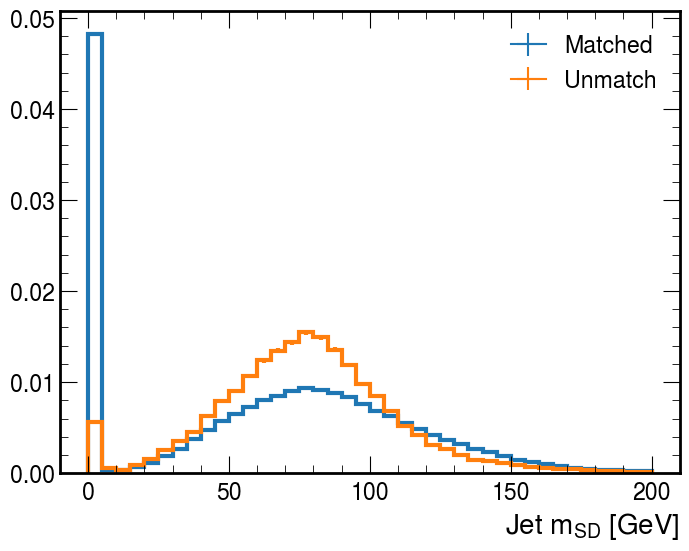

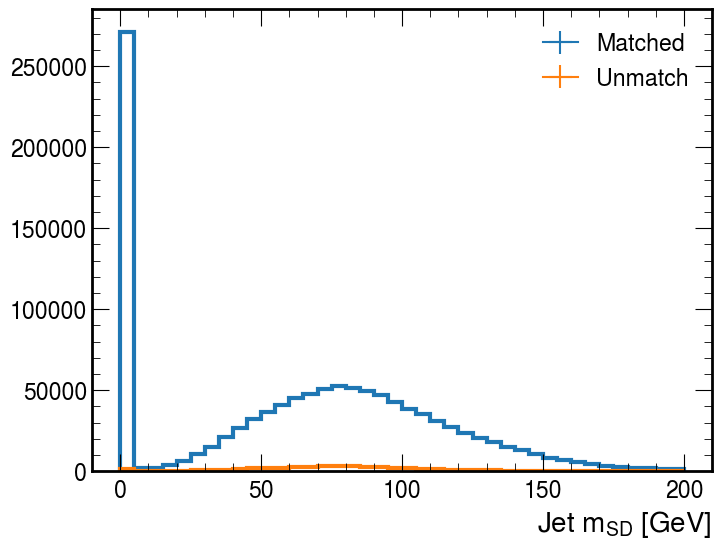

In [9]:
h = hist2.Hist(
    hist2.axis.Regular(40, 0, 200, name="mass", label=r"Jet $m_{SD}$ [GeV]", overflow=True),
    hist2.axis.Regular(2, 0, 2, name="var", label=r"Matched", overflow=True),
)
h.fill(
    mass=data.fj_msoftdrop,
    var=data.fj_Top_isMatched
)
for den in [True,False]:
    fig, ax = plt.subplots(figsize=(8, 6))
    hep.histplot(
        h[{"var": 1}],
        ax=ax,
        label=r"Matched",
        linewidth=3,
        density=den
    )
    hep.histplot(
        h[{"var": 0}],
        ax=ax,
        label=r"Unmatch",
        linewidth=3,
        density=den    
    )
    ax.legend()

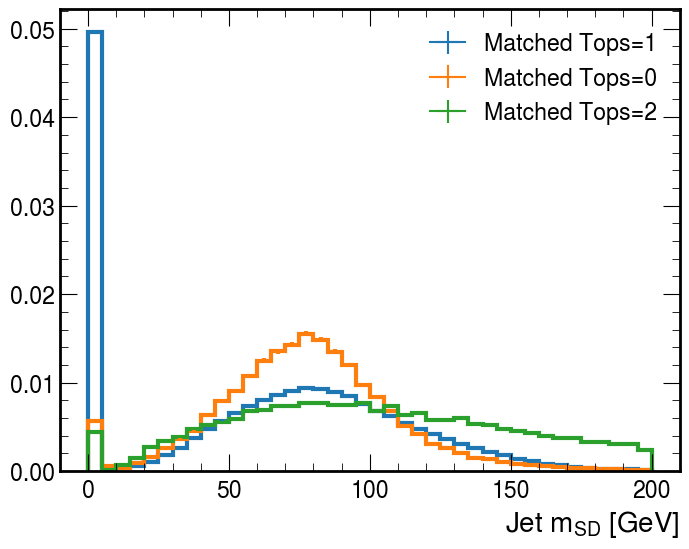

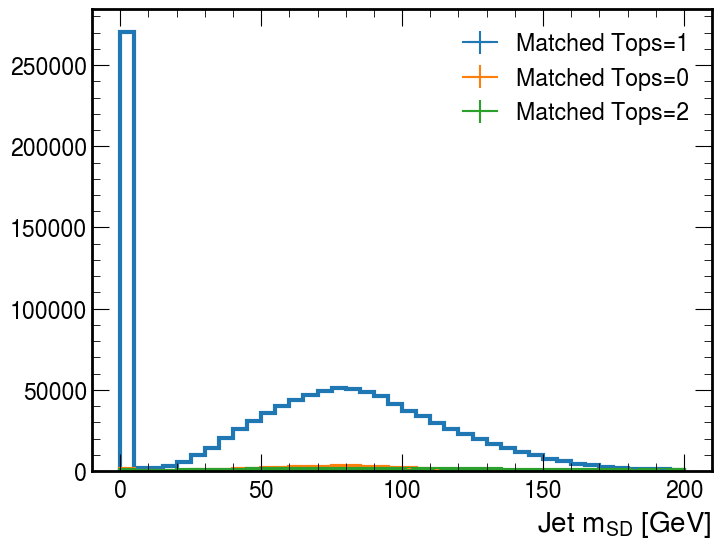

In [10]:
h = hist2.Hist(
    hist2.axis.Regular(40, 0, 200, name="mass", label=r"Jet $m_{SD}$ [GeV]", overflow=True),
    hist2.axis.Regular(3, 0, 3, name="var", label=r"Number of matched Tops", overflow=True),
)
h.fill(
    mass=data.fj_msoftdrop,
    var=data.fj_Top_numMatched
)
for den in [True,False]:
    fig, ax = plt.subplots(figsize=(8, 6))
    hep.histplot(
        h[{"var": 1}],
        ax=ax,
        label=r"Matched Tops=1",
        linewidth=3,
        density=den
    )
    hep.histplot(
        h[{"var": 0}],
        ax=ax,
        label=r"Matched Tops=0",
        linewidth=3,
        density=den    
    )
    hep.histplot(
        h[{"var": 2}],
        ax=ax,
        label=r"Matched Tops=2",
        linewidth=3,
        density=den    
    )
    ax.legend()

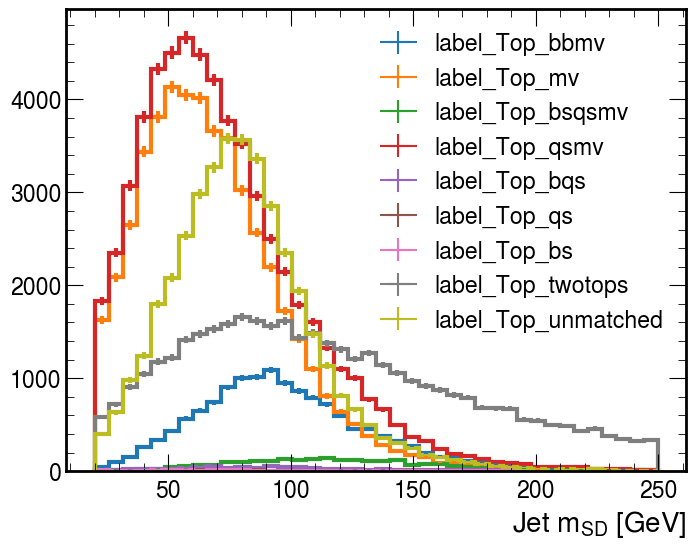

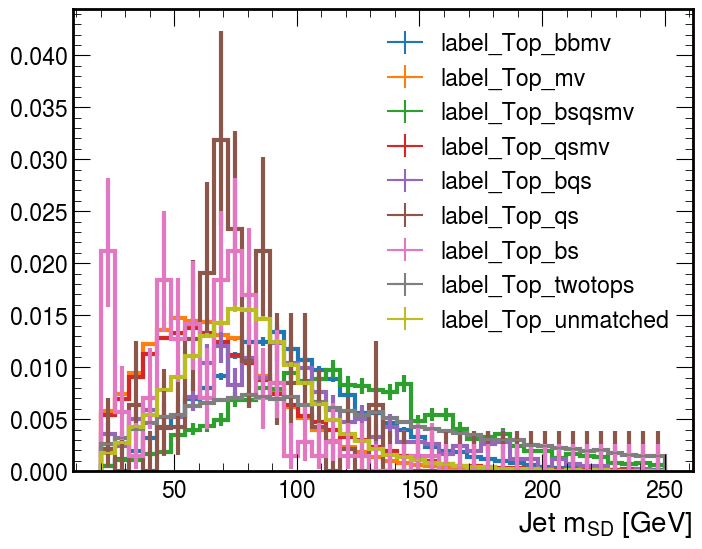

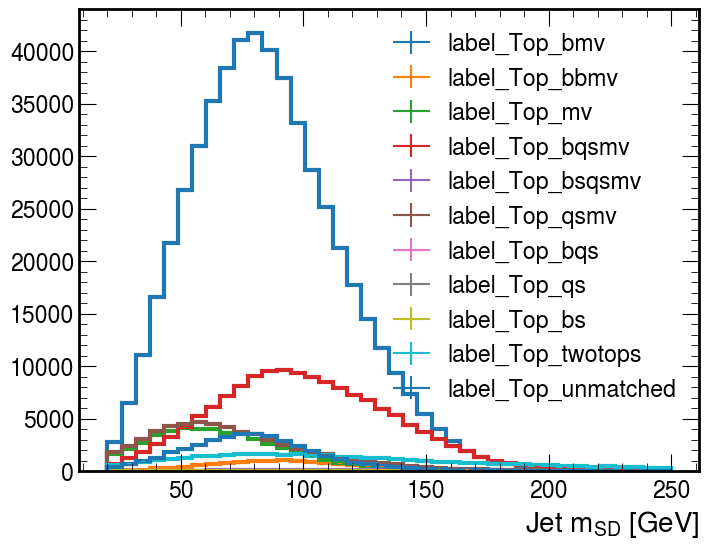

In [18]:
h = hist2.Hist(
    hist2.axis.Regular(40, 20, 250, name="mass", label=r"Jet $m_{SD}$ [GeV]", overflow=True),
    hist2.axis.Boolean(name="bmv"),
    hist2.axis.Boolean(name="bbmv"),
    hist2.axis.Boolean(name="mv"),
    hist2.axis.Boolean(name="bqsmv"),
    hist2.axis.Boolean(name="bsqsmv"),
    hist2.axis.Boolean(name="qsmv"),
    hist2.axis.Boolean(name="bsqs"),
    hist2.axis.Boolean(name="bqs"),
    hist2.axis.Boolean(name="qs"),
    hist2.axis.Boolean(name="bs"),
    hist2.axis.Boolean(name="twotops"),
)
h.fill(
    mass=data.fj_msoftdrop,
    bmv=data.label_Top_bmv,
    bbmv=data.label_Top_bbmv,
    mv=data.label_Top_mv,
    bqsmv=data.label_Top_bqsmv,
    bsqsmv=data.label_Top_bsqsmv,
    qsmv=data.label_Top_qsmv,
    bsqs=data.label_Top_bsqs,
    bqs=data.label_Top_bqs,
    qs=data.label_Top_qs,
    bs=data.label_Top_bs,
    twotops=data.label_2Tops,
)


label_Top_bmv = {"bmv":1,"bbmv":sum,"mv":sum,"bqsmv":sum,"bsqsmv":sum,"qsmv":sum,"bsqs":sum,"bqs":sum,"qs":sum,"bs":sum,"twotops":sum}
label_Top_bbmv = {"bmv":sum,"bbmv":1,"mv":sum,"bqsmv":sum,"bsqsmv":sum,"qsmv":sum,"bsqs":sum,"bqs":sum,"qs":sum,"bs":sum,"twotops":sum}
label_Top_mv = {"bmv":sum,"bbmv":sum,"mv":1,"bqsmv":sum,"bsqsmv":sum,"qsmv":sum,"bsqs":sum,"bqs":sum,"qs":sum,"bs":sum,"twotops":sum}
label_Top_bqsmv = {"bmv":sum,"bbmv":sum,"mv":sum,"bqsmv":1,"bsqsmv":sum,"qsmv":sum,"bsqs":sum,"bqs":sum,"qs":sum,"bs":sum,"twotops":sum}
label_Top_bsqsmv = {"bmv":sum,"bbmv":sum,"mv":sum,"bqsmv":sum,"bsqsmv":1,"qsmv":sum,"bsqs":sum,"bqs":sum,"qs":sum,"bs":sum,"twotops":sum}
label_Top_qsmv = {"bmv":sum,"bbmv":sum,"mv":sum,"bqsmv":sum,"bsqsmv":sum,"qsmv":1,"bsqs":sum,"bqs":sum,"qs":sum,"bs":sum,"twotops":sum}
label_Top_bsqs = {"bmv":sum,"bbmv":sum,"mv":sum,"bqsmv":sum,"bsqsmv":sum,"qsmv":sum,"bsqs":1,"bqs":sum,"qs":sum,"bs":sum,"twotops":sum}
label_Top_bqs = {"bmv":sum,"bbmv":sum,"mv":sum,"bqsmv":sum,"bsqsmv":sum,"qsmv":sum,"bsqs":sum,"bqs":1,"qs":sum,"bs":sum,"twotops":sum}
label_Top_qs = {"bmv":sum,"bbmv":sum,"mv":sum,"bqsmv":sum,"bsqsmv":sum,"qsmv":sum,"bsqs":sum,"bqs":sum,"qs":1,"bs":sum,"twotops":sum}
label_Top_bs = {"bmv":sum,"bbmv":sum,"mv":sum,"bqsmv":sum,"bsqsmv":sum,"qsmv":sum,"bsqs":sum,"bqs":sum,"qs":sum,"bs":1,"twotops":sum}
label_Top_twotops = {"bmv":sum,"bbmv":sum,"mv":sum,"bqsmv":sum,"bsqsmv":sum,"qsmv":sum,"bsqs":sum,"bqs":sum,"qs":sum,"bs":sum,"twotops":1}
label_Top_unmatched = {"bmv":0,"bbmv":0,"mv":0,"bqsmv":0,"bsqsmv":0,"qsmv":0,"bsqs":0,"bqs":0,"qs":0,"bs":0,"twotops":0}


for den in [False,True]:
    fig, ax = plt.subplots(figsize=(8, 6))
    #hep.histplot(
    #    h[label_Top_bmv],ax=ax,label=r"label_Top_bmv",linewidth=3,density=den
    #)
    hep.histplot(
        h[label_Top_bbmv],ax=ax,label=r"label_Top_bbmv",linewidth=3,density=den,
    )
    hep.histplot(
        h[label_Top_mv],ax=ax,label=r"label_Top_mv",linewidth=3,density=den,
    )
    #hep.histplot(
    #    h[label_Top_bqsmv],ax=ax,label=r"label_Top_bqsmv",linewidth=3,density=den,
    #)
    hep.histplot(
        h[label_Top_bsqsmv],ax=ax,label=r"label_Top_bsqsmv",linewidth=3,density=den,
    )
    hep.histplot(
        h[label_Top_qsmv],ax=ax,label=r"label_Top_qsmv",linewidth=3,density=den,
    )
    hep.histplot(
        h[label_Top_bqs],ax=ax,label=r"label_Top_bqs",linewidth=3,density=den,
    )
    hep.histplot(
        h[label_Top_qs],ax=ax,label=r"label_Top_qs",linewidth=3,density=den,
    )
    hep.histplot(
        h[label_Top_bs],ax=ax,label=r"label_Top_bs",linewidth=3,density=den,
    )
    hep.histplot(
        h[label_Top_twotops],ax=ax,label=r"label_Top_twotops",linewidth=3,density=den,
    )
    hep.histplot(
        h[label_Top_unmatched],ax=ax,label=r"label_Top_unmatched",linewidth=3,density=den,
    )
    ax.legend()
    
for den in [False]:
    fig, ax = plt.subplots(figsize=(8, 6))
    hep.histplot(
        h[label_Top_bmv],ax=ax,label=r"label_Top_bmv",linewidth=3,density=den
    )
    hep.histplot(
        h[label_Top_bbmv],ax=ax,label=r"label_Top_bbmv",linewidth=3,density=den,
    )
    hep.histplot(
        h[label_Top_mv],ax=ax,label=r"label_Top_mv",linewidth=3,density=den,
    )
    hep.histplot(
        h[label_Top_bqsmv],ax=ax,label=r"label_Top_bqsmv",linewidth=3,density=den,
    )
    hep.histplot(
        h[label_Top_bsqsmv],ax=ax,label=r"label_Top_bsqsmv",linewidth=3,density=den,
    )
    hep.histplot(
        h[label_Top_qsmv],ax=ax,label=r"label_Top_qsmv",linewidth=3,density=den,
    )
    hep.histplot(
        h[label_Top_bqs],ax=ax,label=r"label_Top_bqs",linewidth=3,density=den,
    )
    hep.histplot(
        h[label_Top_qs],ax=ax,label=r"label_Top_qs",linewidth=3,density=den,
    )
    hep.histplot(
        h[label_Top_bs],ax=ax,label=r"label_Top_bs",linewidth=3,density=den,
    )
    hep.histplot(
        h[label_Top_twotops],ax=ax,label=r"label_Top_twotops",linewidth=3,density=den,
    )
    hep.histplot(
        h[label_Top_unmatched],ax=ax,label=r"label_Top_unmatched",linewidth=3,density=den,
    )
    ax.legend()

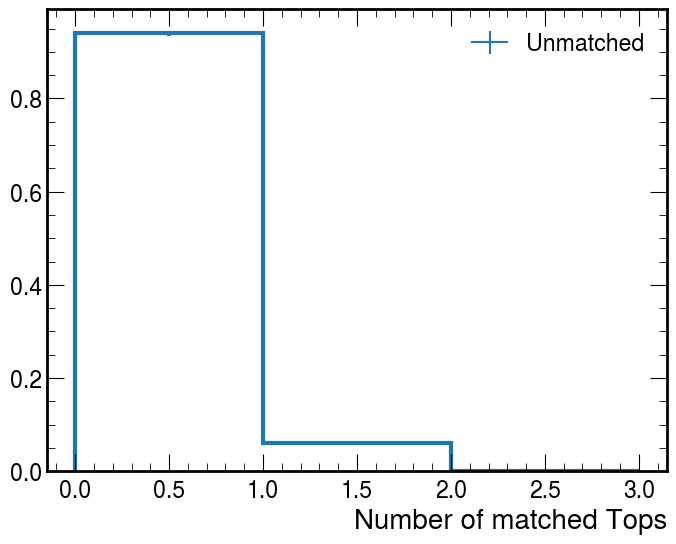

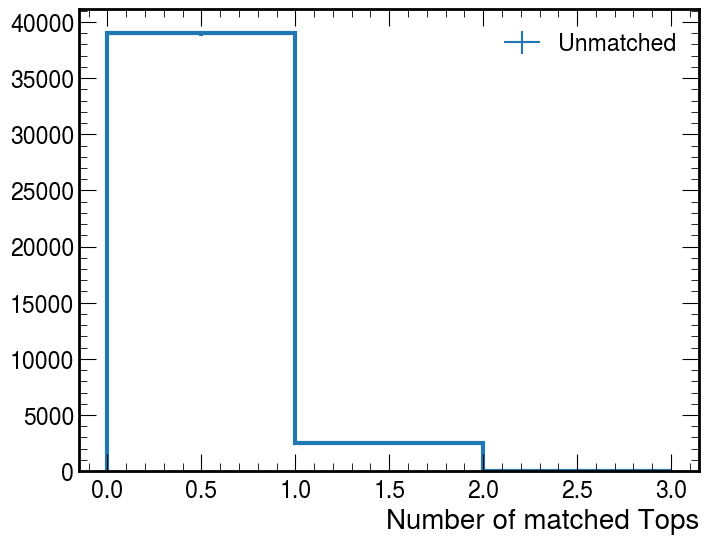

In [12]:
# note: there can be matched_mask = 0 but matched_tops=1 if none of the daughters are matched

h = hist2.Hist(
    hist2.axis.Regular(40, 0, 250, name="mass", label=r"Jet $m_{SD}$ [GeV]", overflow=True),
    hist2.axis.Regular(3, 0, 3, name="var", label=r"Number of matched Tops", overflow=True),
    hist2.axis.Boolean(name="bmv"),
    hist2.axis.Boolean(name="bbmv"),
    hist2.axis.Boolean(name="mv"),
    hist2.axis.Boolean(name="bqsmv"),
    hist2.axis.Boolean(name="bsqsmv"),
    hist2.axis.Boolean(name="qsmv"),
    hist2.axis.Boolean(name="bsqs"),
    hist2.axis.Boolean(name="bqs"),
    hist2.axis.Boolean(name="qs"),
    hist2.axis.Boolean(name="bs"),
    hist2.axis.Boolean(name="twotops"),
)
h.fill(
    mass=data.fj_msoftdrop,
    var=data.fj_Top_numMatched,
    bmv=data.label_Top_bmv,
    bbmv=data.label_Top_bbmv,
    mv=data.label_Top_mv,
    bqsmv=data.label_Top_bqsmv,
    bsqsmv=data.label_Top_bsqsmv,
    qsmv=data.label_Top_qsmv,
    bsqs=data.label_Top_bsqs,
    bqs=data.label_Top_bqs,
    qs=data.label_Top_qs,
    bs=data.label_Top_bs,
    twotops=data.label_2Tops,
)

for den in [True,False]:
    fig, ax = plt.subplots(figsize=(8, 6))
    hep.histplot(
        h[{"mass": sum,"bmv":0,"bbmv":0,"mv":0,"bqsmv":0,"bsqsmv":0,"qsmv":0,"bsqs":0,"bqs":0,"qs":0,"bs":0,"twotops":0}],
        ax=ax,
        label=r"Unmatched",
        linewidth=3,
        density=den
    )
    ax.legend()